In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from CausalBenchmark.data_generation_framework import *
from CausalBenchmark.parameters import build_parameter_object, DEFAULT_PARAMETER_PATH
from CausalBenchmark.data_generation import DataGeneratingProcessWrapper
from CausalBenchmark.utilities import generate_random_covariates

In [3]:
covar_data = generate_random_covariates()

In [4]:
dgp_params = build_parameter_object(DEFAULT_PARAMETER_PATH)

In [5]:
dgp_wrapper = DataGeneratingProcessWrapper(
    parameters=dgp_params, source_covariate_data=covar_data)

dgp_wrapper.sample_dgp()

In [6]:
observed_covariate_data, observed_outcome_data, oracle_covariate_data, oracle_outcome_data = dgp_wrapper.generate_data()

In [7]:
observed_outcome_data.head()

,T,Y
0,1,1.753434
1,1,3.803594
2,0,-0.635371
3,1,-0.977702
4,1,-4.715418


In [8]:
oracle_outcome_data.head()

,logit(P(T|X)),P(T|X),Y0,Y1,TE
0,0.406480,0.600244,0.389963,1.753434,1.363471
1,0.383471,0.594710,3.286305,3.803594,0.517289
2,0.726482,0.674033,-0.635371,-0.198033,0.437337
3,0.619074,0.650008,-1.426653,-0.977702,0.448951
4,0.631144,0.652749,-3.942108,-4.715418,-0.773310


In [9]:
oracle_outcome_data.join(oracle_covariate_data).head()

,logit(P(T|X)),P(T|X),Y0,Y1,TE,TRANSFORMED_X0,TRANSFORMED_X1,TRANSFORMED_X2,TRANSFORMED_X3,TRANSFORMED_X4,...,TRANSFORMED_X51,TRANSFORMED_X52,TRANSFORMED_X53,TRANSFORMED_X54,TRANSFORMED_X55,TRANSFORMED_X56,TRANSFORMED_X57,TRANSFORMED_X58,TRANSFORMED_X59,TRANSFORMED_X60
0,0.406480,0.600244,0.389963,1.753434,1.363471,5.754569,0.726219,15.093009,0.242873,-79.447924,...,70.092831,-1.139960,-0.488630,-264.697024,467.058709,-2.376736,1.705499,-224.972647,-52.834618,-459.416927
1,0.383471,0.594710,3.286305,3.803594,0.517289,-1.558580,-7.370931,18.687948,5.602079,-98.371281,...,18.910267,0.875369,-0.908785,-19.516633,-30.087619,-0.930214,-5.996690,-309.961946,357.245970,43.432635
2,0.726482,0.674033,-0.635371,-0.198033,0.437337,-0.017951,-2.908028,15.134103,-3.719853,-79.664239,...,364.690109,0.991462,-0.181410,-411.480450,-15.913604,5.016632,-4.410748,225.892083,-508.143597,-63.078459
3,0.619074,0.650008,-1.426653,-0.977702,0.448951,5.602640,-2.589072,0.165372,-2.443408,-0.870497,...,-7.245999,0.175528,-1.691849,120.010853,8.268161,1.744312,-4.827616,-0.258022,-1.428488,-4.672222
4,0.631144,0.652749,-3.942108,-4.715418,-0.773310,-1.456669,-6.650904,0.573235,4.237177,-3.017443,...,112.448328,-2.387334,0.532677,-226.739854,55.680069,2.768805,-1.040831,1.665193,141.251827,32.655800


In [10]:
observed_outcome_data.join(observed_covariate_data).head()

,T,Y,X0,X1,X2,X3,X4,X5,X6,X7,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,NOISE(Y)
0,1,1.753434,-4.988866,-1.261010,-6.660453,2.107003,-2.330828,4.746688,0.126774,4.769785,...,-0.853783,-0.132792,-6.142662,-4.494046,1.522825,4.960373,0.811101,-4.931828,-4.658148,-0.773
1,1,3.803594,13.270595,7.535710,4.323835,3.664918,5.790890,-2.559788,-4.425266,-1.844467,...,-2.707003,-8.251547,-2.230381,1.003409,-1.945255,0.572234,-7.121329,-9.937388,1.377387,0.334
2,0,-0.635371,6.941918,1.374067,-1.422055,4.197976,8.074672,3.685918,0.794613,-5.344279,...,-0.020471,-4.675352,6.808028,7.096601,-3.141082,-3.660737,4.437290,6.620788,-12.797153,1.010
3,1,-0.977702,4.547820,-2.186806,3.044066,8.492801,-2.643042,2.119090,2.738168,-9.720637,...,5.598101,-0.385612,4.453406,5.766023,5.601523,-7.615414,4.048058,-7.155180,-9.797740,3.100
4,1,-4.715418,-3.706814,2.632639,2.899103,-7.623863,-4.275835,6.294616,5.206876,-1.048976,...,2.832058,8.075104,9.728722,-4.124796,-0.809450,0.792907,-0.785806,6.495117,0.356299,1.072


## Metrics

In [11]:
from sklearn.linear_model import LogisticRegression, LinearRegression
lr = LinearRegression()
lr.fit(oracle_covariate_data, oracle_outcome_data["logit(P(T|X))"])
lr.score(oracle_covariate_data, oracle_outcome_data["logit(P(T|X))"])

0.9923821777757903

In [12]:
treated = observed_covariate_data[observed_outcome_data["T"] == 1]
control = observed_covariate_data[observed_outcome_data["T"] == 0]
control.shape, treated.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


((337, 21), (663, 21))

In [13]:
from scipy.spatial.distance import cdist


In [17]:
!pip install POT

     |████████████████████████████████| 307kB 541kB/s eta 0:00:01


In [23]:
import ot
import numpy as np
import matplotlib.pylab as pl
import ot.plot

In [29]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([8, 8])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()

Text(0.5, 1.0, 'Cost matrix M')

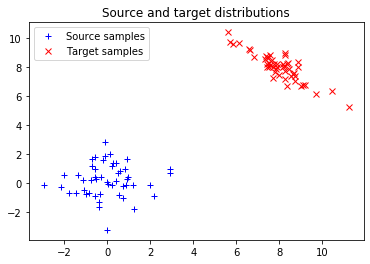

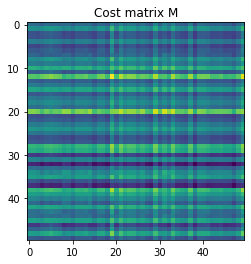

In [30]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

In [31]:
ot.emd2(a, b, M)

0.551264275505211

Text(0.5, 1.0, 'OT matrix with samples')

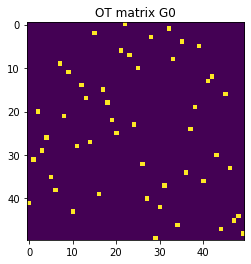

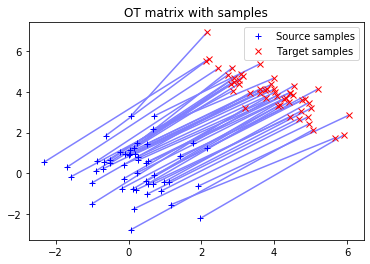

In [26]:
G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')